# Loan Approval Prediction


### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
df = pd.read_csv("Loan Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Preprocessing the dataset

In [5]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#fill the missing values for numerical terms 
#this will be filled with mean of that column
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# Why mode()[0] ??
df['Gender'].mode()
#Becase mode gives the result in form of data frame . So as we only need value
df['Gender'].mode()[0]

'Male'

In [8]:
#Fill the missing values of categorical terms with the most occuring category (Mode)
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [9]:
#Check for the null values 
#find the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Our data has been pre-processed

### Analyzing Data

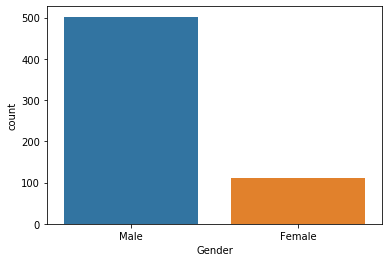

In [10]:
sns.countplot(df['Gender'])

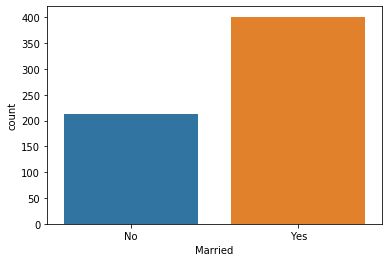

In [11]:
sns.countplot(df['Married'])

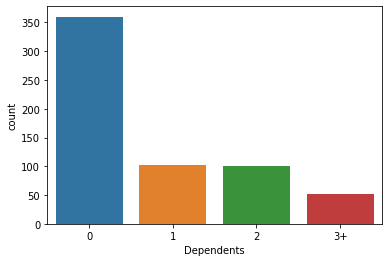

In [12]:
sns.countplot(df['Dependents'])

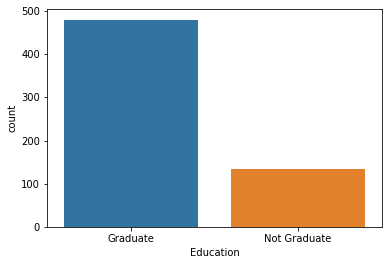

In [13]:
sns.countplot(df['Education'])

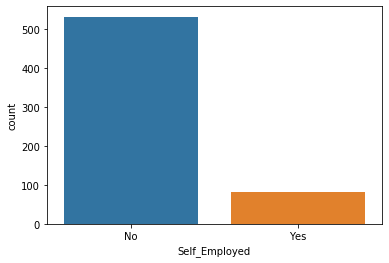

In [14]:
sns.countplot(df['Self_Employed'])

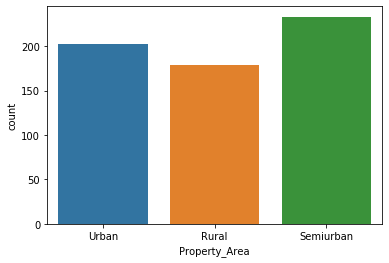

In [15]:
sns.countplot(df['Property_Area'])

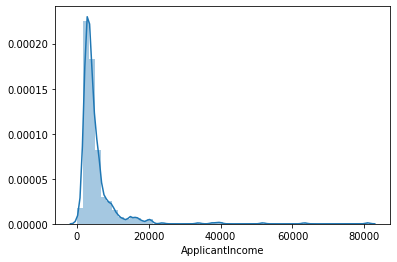

In [16]:
# Applying Log Transformation to get bell curve
df['ApplicantIncomeLog']= np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

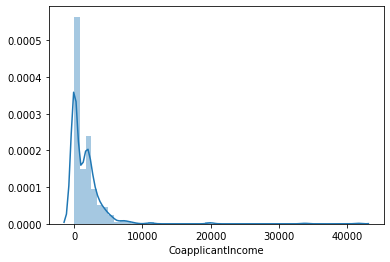

In [17]:
sns.distplot(df['CoapplicantIncome'])

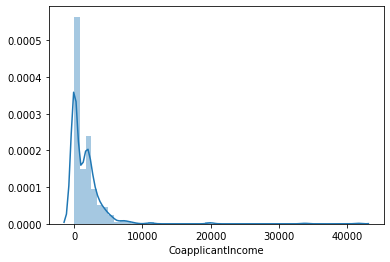

In [18]:
sns.distplot(df['CoapplicantIncome'])

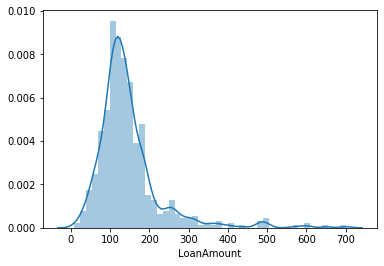

In [19]:
sns.distplot(df['LoanAmount'])

In [20]:
# Applying Log Transformation to get bell curve
df['LoanAmountLog']= np.log(df['LoanAmount'])

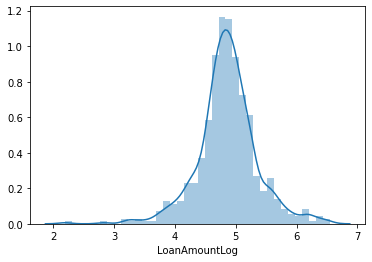

In [21]:
sns.distplot(df['LoanAmountLog'])

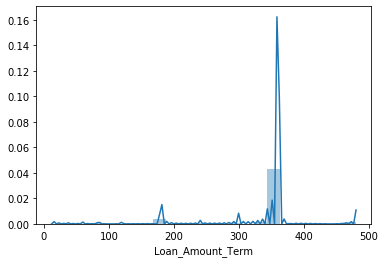

In [22]:
sns.distplot(df['Loan_Amount_Term'])

In [23]:
df['Loan_Amount_TermLog']= np.log(df['Loan_Amount_Term'])

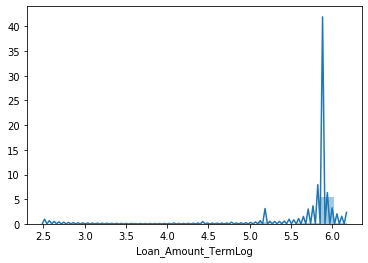

In [24]:
sns.distplot(df['Loan_Amount_TermLog'])

In [25]:
#Total Income
df['Total_Income']= df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,4.948760,5.886104,6000.0


In [26]:
df['Total_Income_Log']= np.log(df['Total_Income'])

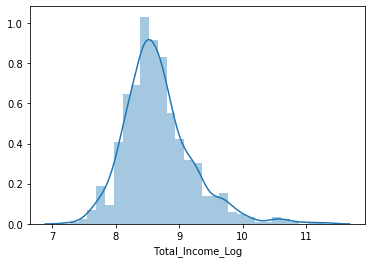

In [27]:
sns.distplot(df['Total_Income_Log'])

## Correlation


In [28]:
corr = df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.790532,0.434849,-0.024085,0.893037,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.237900,0.204179,-0.042941,0.342781,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.551556,0.895324,0.044905,0.620102,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.030739,0.086531,0.938871,-0.069830,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.019169,-0.025248,-0.007860,-0.014447,0.019156
ApplicantIncomeLog,0.790532,-0.237900,0.551556,-0.030739,0.019169,1.000000,0.491066,-0.014618,0.639953,0.740300
LoanAmountLog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.491066,1.000000,0.084534,0.503817,0.657507
Loan_Amount_TermLog,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.014618,0.084534,1.000000,-0.042237,-0.029522
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,0.639953,0.503817,-0.042237,1.000000,0.852873
Total_Income_Log,0.717829,0.383827,0.687552,-0.055320,0.019156,0.740300,0.657507,-0.029522,0.852873,1.000000


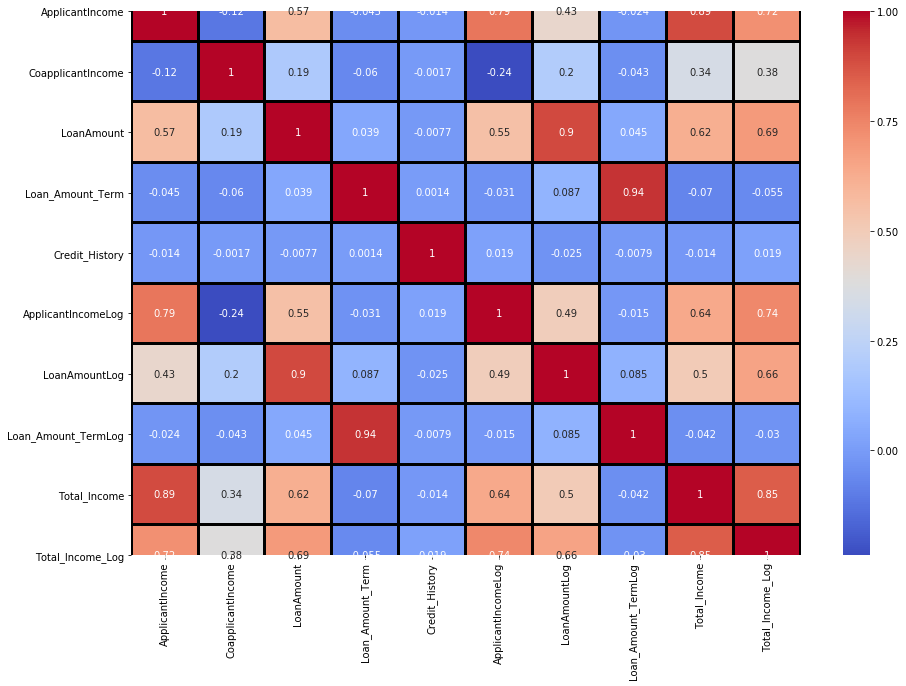

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='coolwarm',annot=True,linecolor='black', linewidths=2)

In [30]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Training Set

In [33]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [35]:
from sklearn.model_selection import cross_val_score
def classifying(model,x,y):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation is",np.mean(score)*100)
    
    

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classifying(model,x,y)

Accuracy is 77.27272727272727
Cross validation is 80.79587519830778


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classifying(model, x, y)

Accuracy is 68.18181818181817
Cross validation is 72.49338974087784
